                 Life satisfaction  GDP per capita
South Africa                   4.8     6120.506800
Mexico                         6.6     9281.101483
Brazil                         6.6     9880.946543
Turkey                         5.5    10499.745573
Poland                         6.0    13861.051558
Hungary                        5.3    14278.874498
Chile                          6.7    15037.350109
Latvia                         5.9    15684.558519
Slovak Republic                6.1    17579.259399
Greece                         5.2    18883.460067
Estonia                        5.6    20200.375592
Czech Republic                 6.6    20379.896040
Portugal                       5.2    21291.430881
Slovenia                       5.8    23449.574517
Spain                          6.4    28208.261053
Italy                          5.9    32155.205866
Japan                          5.9    38331.979398
France                         6.4    38679.127148
United Kingdom                 

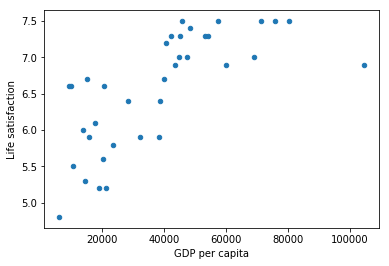

[[5.71822436]]


In [12]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

# load data
oecd_bli = pd.read_csv("BLI2017_23082019102152615.csv", 
                       thousands=',', 
                       index_col='Country')
gdp_per_capita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_103696.csv", 
                             thousands=',', 
                             skiprows=4, 
                             index_col='Country Name')

# prepare data
gdp_per_capita.rename(columns={"2017": "gdp", "Country Name": "Country"}, inplace=True)

filtered_bli = oecd_bli[oecd_bli['Indicator']=="Life satisfaction"]
filtered_bli = filtered_bli[filtered_bli['INEQUALITY']=="TOT"]

gdp_per_capita = pd.DataFrame({'GDP per capita': gdp_per_capita.gdp})
filtered_bli = pd.DataFrame({'Life satisfaction': filtered_bli.Value})

country_stats = pd.merge(left=filtered_bli, right=gdp_per_capita, left_index=True, right_index=True)
country_stats.sort_values(by="GDP per capita", inplace=True)

print(country_stats)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# visualize
country_stats.plot(kind='scatter', x = "GDP per capita", y = 'Life satisfaction')
plt.show()

# chose linear model
model = sklearn.linear_model.LinearRegression() # teach model
model.fit(X, y)

# fit predict for ukraine
X_new = [[2994]] # gdp for person ukraine 
print(model.predict(X_new))